# Softmax Explained

### Problem: 

Given a bunch of numbers each representing a value for a given item you want to transform them into a metric to identify the highest value with the following properties:

- the resulting metric should normalize all values, that is the sum of all values should be 1
- the metric should favor only one item among the numbers (the one with the highest original value), thus boosting it to make it stand apart more clearly

### Use case:

Activation function in the last layer of a classification network. Each item stands for a certain class and only one class is to be selected. In the previous layer any kind of activation can result (normally between 0 and infinity) but we want to have a normalized output at the end that tells us which class has been activated.

### Two-step approach

1. Make all values positive (and boost higher values)
2. Normalize all values so that they sum to 1.

In [0]:
import numpy as np
original_values = np.random.randn(10)

In [0]:
original_values

array([-0.15963517, -0.30992638, -1.06084824, -0.38143377, -0.05976624,
        0.44650816, -3.53384424, -0.33987354,  1.06011392, -0.06605931])

#### Step 1: Make everything positive while keeping the order of elements constant (monotonicity)

There are various ways of doing it, but a very convenient one is to use each value as the power of exp

In [0]:
step1 = np.exp(original_values)

In [0]:
step1

array([0.85245473, 0.73350096, 0.34616206, 0.68288161, 0.9419847 ,
       1.56284543, 0.02919248, 0.71186034, 2.88669984, 0.93607534])

In [0]:
# check if the ranks in both arrays are still the same (order is preserved)
from numpy.testing import assert_array_equal
assert_array_equal(np.argsort(step1), np.argsort(step1))

# check if all values are positive
assert all(step1 > 0)

#### Step 2: Normalize the values to lie between 0 and 1. The sum of all values should be 1

In [0]:
step2 = step1/step1.sum()

In [0]:
step2

array([0.08803024, 0.07574627, 0.03574704, 0.07051898, 0.09727571,
       0.16139   , 0.00301461, 0.07351152, 0.29810016, 0.09666547])

In [0]:
# check if all values are between 0 and 1
softmax_values = step2
assert all(0 <= softmax_values)
assert all(softmax_values <= 1)

# check if the values sum up to 1
from numpy.testing import assert_almost_equal
assert_almost_equal(softmax_values.sum(), 1)

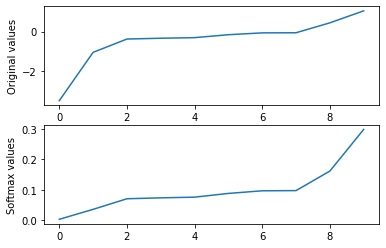

In [0]:
# Plot the original_values versus the softmax values. 
# We sort both arrays in increasing order. You can see that the line for the softmax_values
# is slightly steeper, thus indicating the boost of higher values.
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(sorted(original_values));
ax1.set(ylabel="Original values");
ax2.plot(sorted(softmax_values));
ax2.set(ylabel="Softmax values");

### Usage in Deep Learning frameworks

All Deep Learning frameworks have softmax functions. Here we show the Keras and PyTorch versions.

In [0]:
import keras
from keras import backend as K
keras_result = keras.activations.softmax(K.variable(value=original_values.reshape(1, -1)), axis=-1).numpy().flatten()

In [0]:
# Since Keras's softmax function uses a different approach, the precision of the results varies
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(keras_result, softmax_values)

In [0]:
import torch
pytorch_result = torch.nn.functional.softmax(torch.tensor(original_values.reshape(1, -1)), dim=1).numpy().flatten()

In [0]:
pytorch_result

array([0.08803024, 0.07574627, 0.03574704, 0.07051898, 0.09727571,
       0.16139   , 0.00301461, 0.07351152, 0.29810016, 0.09666547])

In [0]:
assert_array_almost_equal(pytorch_result, softmax_values)

### Caveat

Since softmax boosts the item with the highest value (winner takes it all), you shouldn't be using softmax whenever you want to have more than one element in the output (e.g., in multi-label classification scenarios).